# Laboratorio: Algoritmo di discesa del gradiente

### Applicare l'algoritmo di discesa del gradiente alla seguente funzione.
$$
f : \mathbb{R}^2 \rightarrow \mathbb{R}
$$
$$
f(x, y) = x \log(y)
$$

Ovvero, usare `numpy` e `matplotlib` per:
- definire la funzione
- visualizzare la funzione
    - prima definire una meshgrid (visualizzare la meshgrid con plot scatter)
    - poi visualizzare la superficie
    - infine, visualizzare le sue curve di livello
- calcolare il gradiente della funzione
- definire una strategia di arresto
- implementare l'algoritmo di discesa del gradiente
- applicare l'algoritmo alla funzione f
- visualizzare il percorso individuato dall'algoritmo
    - visualizzazione sulla superficie
    - visualizzazione "dall'alto"

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Definizione della funzione

In [160]:
def f(x, y):
    return x * np.log(y)

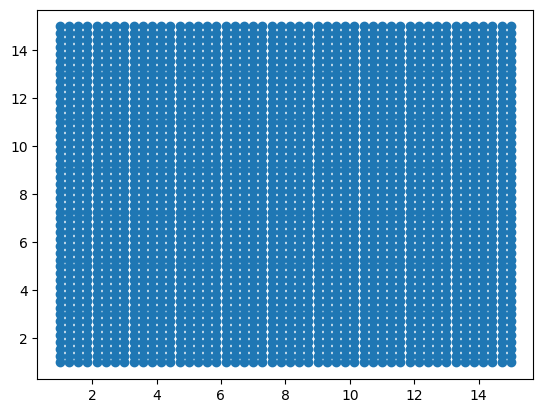

In [161]:
lin_x = np.linspace(1, 15)
lin_y = np.linspace(1, 15)

x, y = np.meshgrid(lin_x, lin_y)
z = f(x, y)

plt.scatter(*np.meshgrid(lin_x, lin_y))
plt.show()

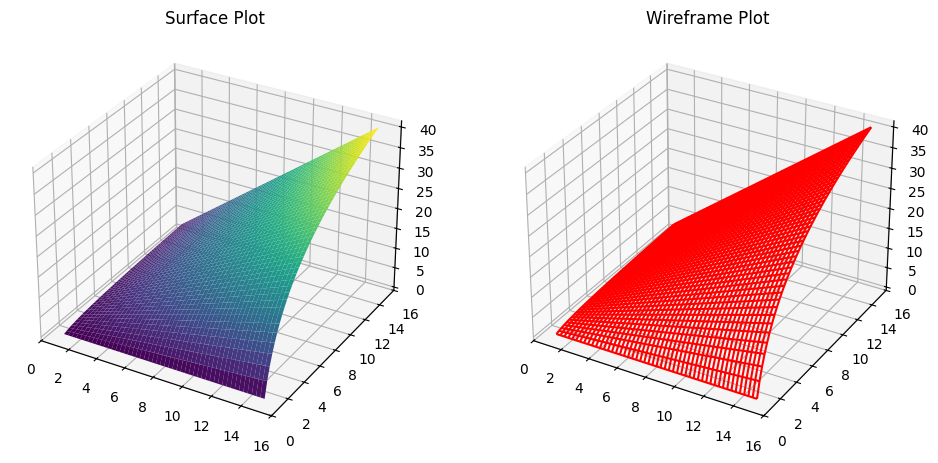

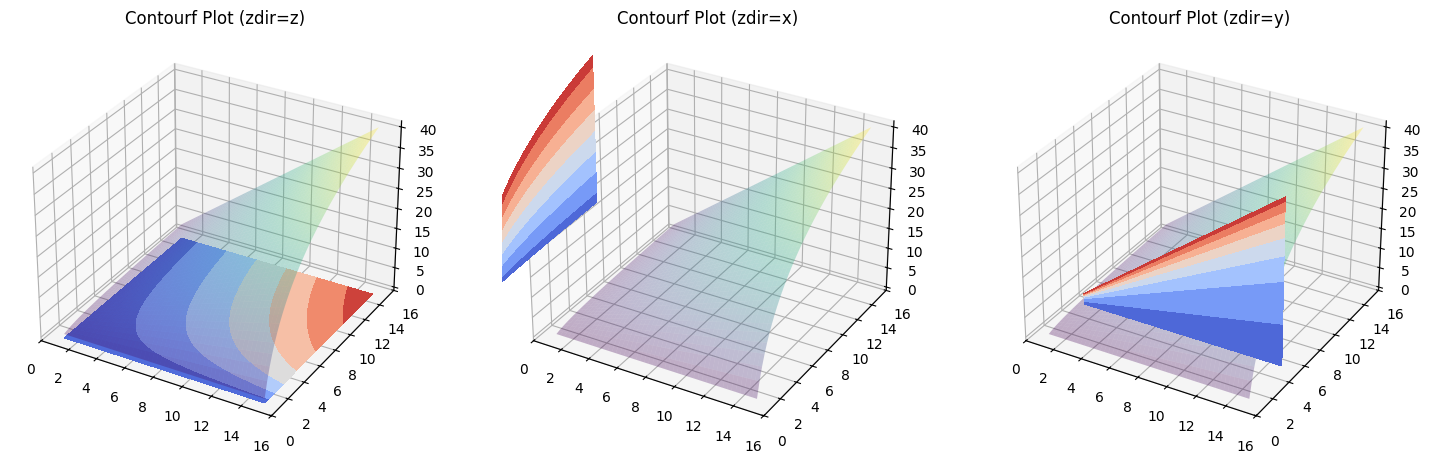

In [162]:
# Creazione della griglia di subplot
fig = plt.figure(figsize=(18, 6))

# Plot della superficie
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x, y, z, cmap=cm.viridis)
ax1.set_title('Surface Plot')

# Plot del wireframe
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_wireframe(x, y, z, color='r')
ax2.set_title('Wireframe Plot')

# Creazione della griglia di subplot per i contorni
fig2, (ax3, ax4, ax5) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(18, 6))

# Plot dei contorni
ax3.plot_surface(x, y, z, cmap=cm.viridis, alpha=0.3)
ax3.contourf(x, y, z, zdir='z', offset=-1, cmap='coolwarm')
ax3.set_title('Contourf Plot (zdir=z)')

ax4.plot_surface(x, y, z, cmap=cm.viridis, alpha=0.3)
ax4.contourf(x, y, z, zdir='x', offset=-5, cmap='coolwarm')
ax4.set_title('Contourf Plot (zdir=x)')

ax5.plot_surface(x, y, z, cmap=cm.viridis, alpha=0.3)
ax5.contourf(x, y, z, zdir='y', offset=5, cmap='coolwarm')
ax5.set_title('Contourf Plot (zdir=y)')

plt.show()

## Calcolo del gradiente

$$
\nabla f = \left( \log{y}, \frac{x}{y} \right)
$$

In [163]:
def f_gradient(x, y):
    return np.array(np.log(y), x / y)

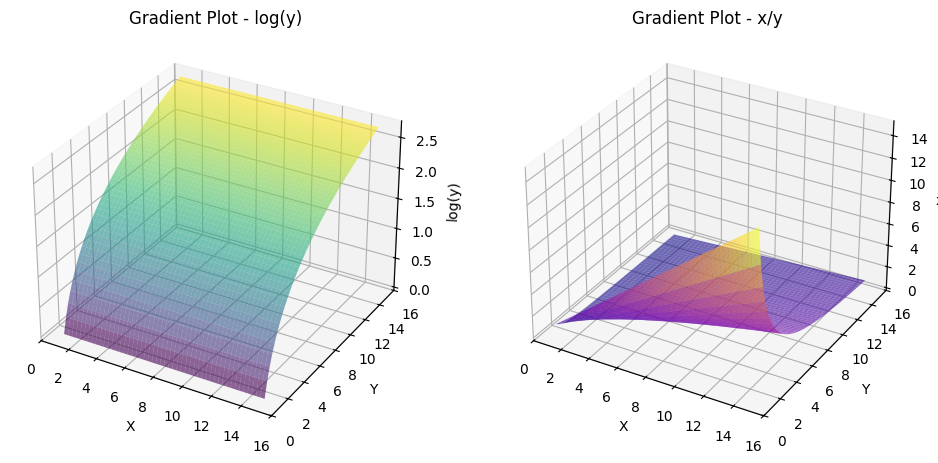

In [164]:
z_grad = np.array([np.log(y), x / y])

# Creazione della griglia di subplot
fig = plt.figure(figsize=(18, 6))

# Plot della prima componente del gradiente
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x, y, z_grad[0], cmap='viridis', alpha=0.6)
ax1.set_title('Gradient Plot - log(y)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('log(y)')

# Plot della seconda componente del gradiente
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x, y, z_grad[1], cmap='plasma', alpha=0.6)
ax2.set_title('Gradient Plot - x/y')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('x/y')

plt.show()

L'algoritmo iterativo di discesa del gradiente è definito nel seguente modo:

$$
\begin{cases}
x_0 &= a\\
x_{k+1} &= x_k - \eta \nabla f(x_k) 
\end{cases}
$$

dove $a$ è un punto nel dominio di $f$ e $\eta \in \mathbf{R}$, $\eta > 0$ un iperparametro dell'algoritmo. 

In [165]:
def cerca_minimo(x_0, eta, iterazioni):

    x = [x_0]

    for _ in range(iterazioni - 1):

        x_k = x[-1] - eta * f_gradient(x[-1][0], x[-1][1])

        x.append(x_k)

    return np.array(x).transpose()

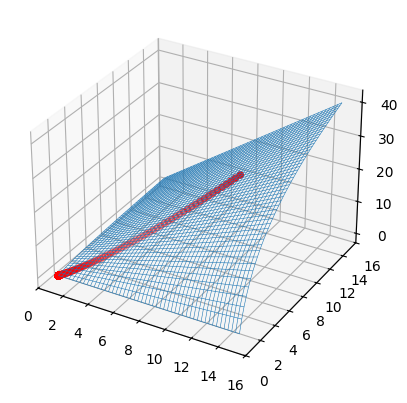

In [169]:
n_iterazioni = 10000

eta = 0.1

x_0 = np.array([10, 10])

min_x = cerca_minimo(x_0, eta, n_iterazioni)

ax2 = plt.axes(projection='3d')

ax2.plot_wireframe(x, y, z, linewidth=0.4)
ax2.scatter(min_x[0], min_x[1], f(min_x[0], min_x[1]), c='r')

plt.show()

### Applicare poi l'algoritmo alle seguenti funzioni.


#### Loss $L_1$, detta "geometria del taxi".
$$
L_1 : \mathbb{R}^{2N} \rightarrow \mathbb{R}
$$

$$
L_1(\underline{x}, \underline{y}) = \frac{1}{N} \sum_{i = 1}^N {| x_i - y_i |}
$$
dove $\underline{x} \in \mathbb{R}^N$ e $\underline{y} \in \mathbb{R}^N$.


*Suggerimento:* per visualizzare la funzione, prendere ad esempio $N = 1$.

#### Loss $L_2$, detta MSE (Mean Squared Error).
$$
L_2 : \mathbb{R}^{2N} \rightarrow \mathbb{R}
$$

$$
L_2(\underline{x}, \underline{y}) = \frac{1}{2N} \sum_{i = 1}^N {| x_i - y_i |}^2
$$
dove $\underline{x} \in \mathbb{R}^N$ e $\underline{y} \in \mathbb{R}^N$.

#### Cross-Entropy Loss.
$$
CE : \mathbb{R}^{2N} \rightarrow \mathbb{R}
$$

$$
CE(\underline{x}, \underline{y}) = \sum_{i = 1}^N x_i \log(y_i) 
$$

dove $\underline{x} \in \mathbb{R}^N$ e $\underline{y} \in \mathbb{R}^N$.